In [18]:
import subprocess
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
def initialize_experiment() -> None:
    subprocess.run(["make"])

def run_experiment(d_value: int, p_value: float, requests_number: int, repetitions: int) -> float:
    result = subprocess.run(f"./experiment {requests_number} {d_value} {p_value} {repetitions}",
                            shell=True, capture_output=True, text=True)
    cost, max_copies = result.stdout.split()
    return float(cost), float(max_copies)

def clean_experiment() -> None:
    subprocess.run(["make", "clean"])

In [20]:
D_VALUES = [16, 32, 64, 128, 256, 384, 512, 640, 768, 896]
P_VALUES = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.75, 0.99]
REQUESTS_NUMBER = 65536
REPS = 1000

initialize_experiment()

results = []
for d in D_VALUES:
    for p in P_VALUES:
        cost, max_copies = run_experiment(d, p, REQUESTS_NUMBER, REPS)
        results.append((d, p, cost, max_copies))
results_df = pd.DataFrame(results, columns=["d", "p", "cost", "max_copies"])

with open("results.pkl", "wb") as f:
    pickle.dump(results_df, f)

clean_experiment()

g++ -std=c++17 -Wall -Wextra -Werror -pedantic -O3 main.cpp -o experiment
rm -f experiment


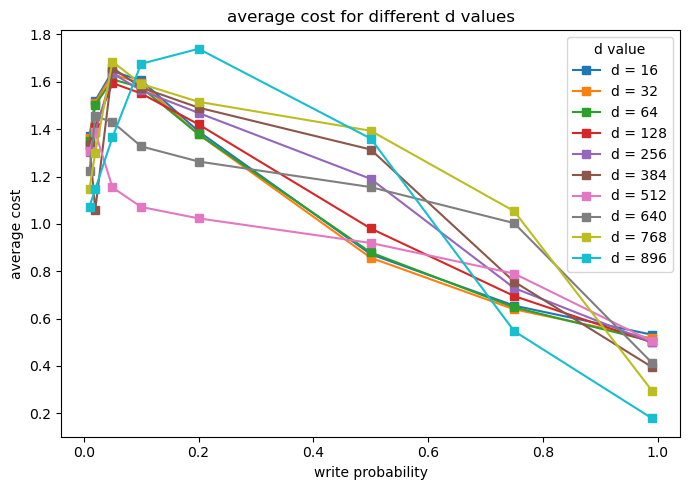

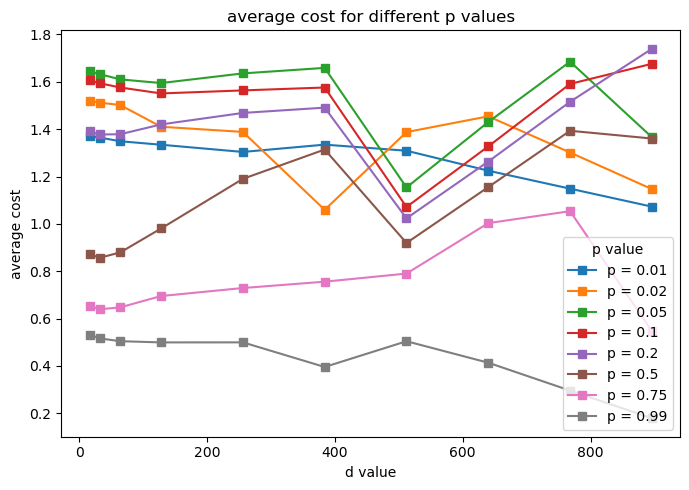

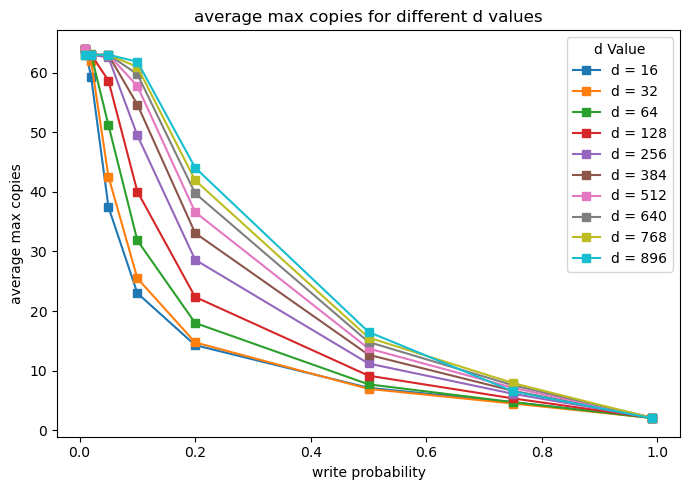

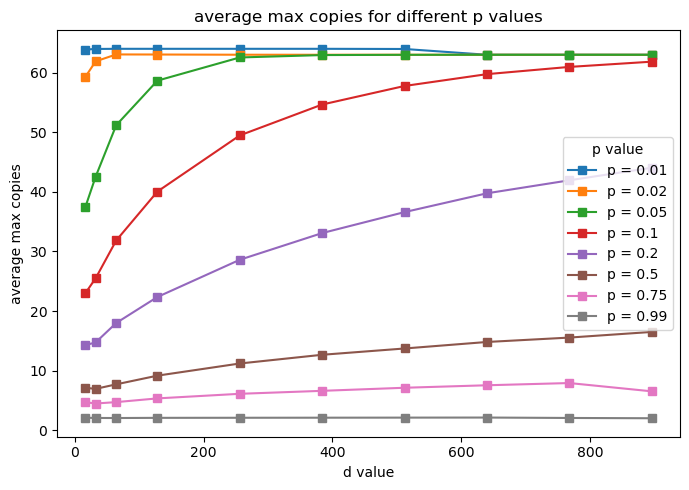

In [21]:
with open("results.pkl", "rb") as f:
    df = pickle.load(f)

plt.figure(figsize=(7, 5))
for d_value in df['d'].unique():
    subset_df = df[df['d'] == d_value]
    plt.plot(subset_df['p'], subset_df['cost'], marker='s', label=f'd = {d_value}')

plt.xlabel('write probability')
plt.ylabel('average cost')
plt.title('average cost for different d values')
plt.legend(title='d value')
plt.tight_layout()
plt.savefig("plots/average_cost_d.png")
plt.show()

plt.figure(figsize=(7, 5))
for p in df['p'].unique():
    subset_df = df[df['p'] == p]
    plt.plot(subset_df['d'], subset_df['cost'], marker='s', label=f'p = {p}')

plt.xlabel('d value')
plt.ylabel('average cost')
plt.title('average cost for different p values')
plt.legend(title='p value')
plt.tight_layout()
plt.savefig("plots/average_cost_p.png")
plt.show()

plt.figure(figsize=(7, 5))
for d_value in df['d'].unique():
    subset_df = df[df['d'] == d_value]
    plt.plot(subset_df['p'], subset_df['max_copies'], marker='s', label=f'd = {d_value}')

plt.xlabel('write probability')
plt.ylabel('average max copies')
plt.title('average max copies for different d values')
plt.legend(title='d Value')
plt.tight_layout()
plt.savefig("plots/average_max_copies_d.png")
plt.show()

plt.figure(figsize=(7, 5))
for p in df['p'].unique():
    subset_df = df[df['p'] == p]
    plt.plot(subset_df['d'], subset_df['max_copies'], marker='s', label=f'p = {p}')
plt.xlabel('d value')
plt.ylabel('average max copies')
plt.title('average max copies for different p values')
plt.legend(title='p value')
plt.tight_layout()
plt.savefig("plots/average_max_copies_p.png")
plt.show()